- 导入函数库和数据集

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.datasets import mnist
SEED = 2017

Using TensorFlow backend.


- 加载MNIST数据集

In [4]:
(X_train, y_train), (X_val, y_val) = mnist.load_data("/home/zhouchen/Jupyter/前馈神经网络/data/mnist.npz", )

- 显示每个标签的示例并输出，对显示的每个标签计数

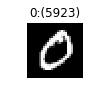

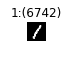

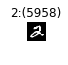

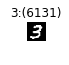

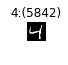

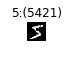

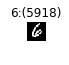

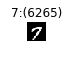

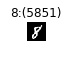

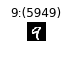

In [5]:
# 按标号绘制第一个图像
unique_labels = set(y_train)
plt.figure(figsize=(12, 12))
i = 1
for label in unique_labels:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}:({1})".format(label, y_train.tolist().count(label)))
    i += 1
    _ = plt.imshow(image, cmap='gray')
    plt.show()

- 数据预处理


In [6]:
# 数据标准化
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
# 对标号one-hot编码
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
# 拼合数据－将图像拉伸为一系列连续值
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))

- 用Sigmoid激活函数定义模型

In [7]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid'))
model_sigmoid.add(Dense(350, activation='sigmoid'))
model_sigmoid.add(Dense(100, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))
# 用SGD编译模型
model_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


- 使用Relu激活函数定义模型


In [8]:
model_relu = Sequential()
model_relu.add(Dense(700, input_dim=784, activation='relu'))
model_relu.add(Dense(700,  activation='relu'))
model_relu.add(Dense(700,  activation='relu'))
model_relu.add(Dense(700,  activation='relu'))
model_relu.add(Dense(700,  activation='relu'))
model_relu.add(Dense(350,  activation='relu'))
model_relu.add(Dense(100,  activation='relu'))
model_relu.add(Dense(10, activation='softmax'))
# 用SGD编译模型
model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

- 创建一个回调函数来存储每个批次的损失值

In [9]:
class history_loss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs=[]):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

- 运行模型


In [10]:
n_epochs = 10
batch_size = 256
validation_split = 0.2
history_sigmoid = history_loss()
model_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, callbacks=[history_sigmoid], validation_split=validation_split, verbose=2)

history_relu = history_loss()
model_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, callbacks=[history_relu], validation_split=validation_split, verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 33s - loss: 2.3201 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 2/10
 - 32s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 3/10
 - 31s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 4/10
 - 29s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 5/10
 - 29s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3024 - val_acc: 0.1060
Epoch 6/10
 - 31s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 7/10
 - 33s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 8/10
 - 31s - loss: 2.3013 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 9/10
 - 31s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 10/10
 - 32s - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 31s - loss: 2.2388 - acc: 0.3028 - val_loss: 

- 绘制损失分布图

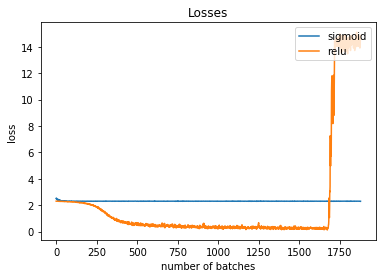

In [16]:

plt.plot(np.arange(len(history_sigmoid.losses)), history_sigmoid.losses, label='sigmoid')
plt.plot(np.arange(len(history_relu.losses)), history_relu.losses, label='relu')
plt.title('Losses')
plt.xlabel('number of batches')
plt.ylabel('loss')
plt.legend(loc=1)
plt.show()

- 提取每层模型的最大权重

In [19]:
w_sigmoid = []
w_relu = []
for i in range(len(model_sigmoid.layers)):
    w_sigmoid.append(max(model_sigmoid.layers[i].get_weights()[1]))
    w_relu.append(max(model_relu.layers[i].get_weights()[1]))

- 绘制两个模型的权重分布

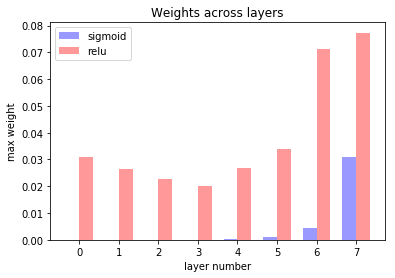

In [20]:
fig, ax = plt.subplots()
index = np.arange(len(model_sigmoid.layers))
bar_width = 0.35
plt.bar(index, w_sigmoid, bar_width, label='sigmoid', color='b', alpha=0.4)
plt.bar(index+bar_width, w_relu, bar_width, label='relu', color='r', alpha=0.4)
plt.title('Weights across layers')
plt.xlabel('layer number')
plt.ylabel('max weight')
plt.legend(loc=0)
plt.xticks(index+bar_width/2, np.arange(8))
plt.show()